<a href="https://colab.research.google.com/github/PPatrickGU/Projet-Adagos/blob/main/Projet_d'Adagos_imgaeRGB_3_Networks_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet d'Adagos**
### ***Author: Zheyi SHEN, Zhaoyi GUAN, Dajing GU & Anastasiya DULEPOVA*** 

In [ ]:
import cv2
import numpy as np
import random
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
# mount my google drive 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


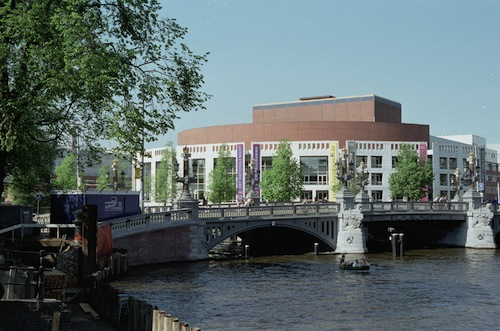

In [ ]:
# read the image
path_img = '/drive/My Drive/PIC-PROJ/image/Amst.jpg'
img = cv2.imread(path_img)
cv2_imshow(img)

## **Image procession**

In [ ]:
def random_type(img, ratio):
  (h,w,d) = img.shape
  new_img = img.copy()
  num = int(h * w * ratio)
  index_y = np.random.randint(h,size=num)
  index_x = np.random.randint(w,size=num)
  coordiante = np.vstack((index_y, index_x)).transpose(1,0)
  #pix_non_caches = []
  for i in range(num):
    new_img[index_y[i],index_x[i],:] = 0
  return new_img, coordiante


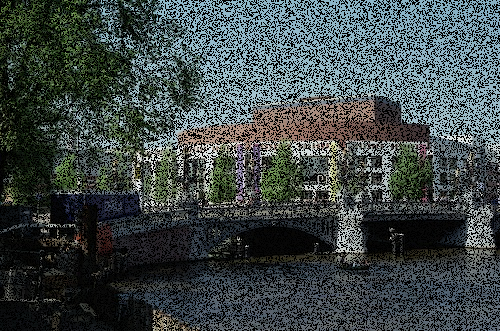

In [ ]:
new_img, coordinate = random_type(img,0.4)
cv2_imshow(new_img)

In [ ]:
def grid_type(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  coordinate = []
  for i in range(0,h,2):
    for j in range(0,w,2):
      new_img[i,j,:] = 0
      coordinate.append([i,j])
  return new_img, coordinate

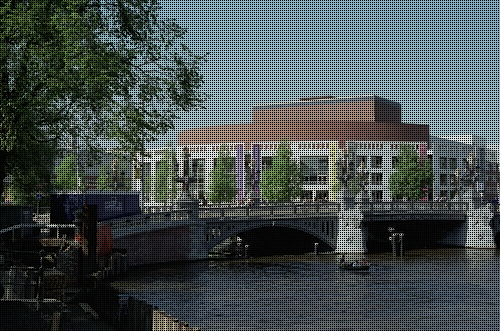

In [ ]:
# cv2_imshow(grid_type(img))
new_img, coordinate = grid_type(img)
cv2_imshow(new_img)

In [ ]:
def rectangle_type(img, hr, wr):
  (h,w,d) = img.shape
  new_img = img.copy()
  y = np.random.randint(h)
  x = np.random.randint(w)
  coordinate = []
  for i in range(y,min(y+hr,h)):
    for j in range(x,min(x+wr,w)):
      new_img[i,j,:] = 0
      coordinate.append([i,j])
  return new_img, coordinate 
  

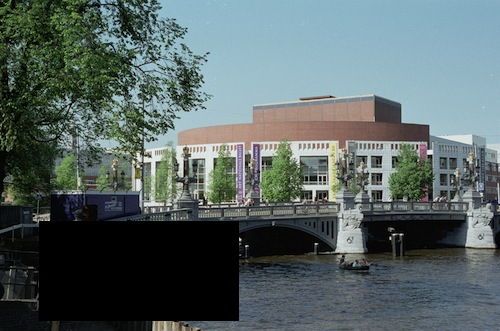

In [ ]:
new_img, coordinate = rectangle_type(img,100,200)
cv2_imshow(new_img)  

In [ ]:
def vertical_stripes(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  coordinate = []
  for i in range(0,h):
    for j in range(0,w,2):
      new_img[i,j,:] = 0
      coordinate.append([i,j])
  return new_img, coordinate

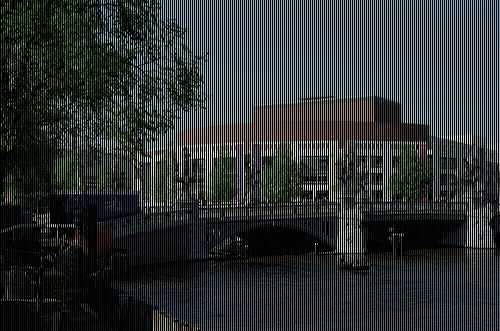

In [ ]:
new_img, coordinate = vertical_stripes(img)
cv2_imshow(new_img)

In [ ]:
def horizontal_stripes(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  coordinate = []
  for i in range(0,h,2):
    for j in range(0,w):
      new_img[i,j,:] = 0
      coordinate.append([i,j])
  return new_img, coordinate

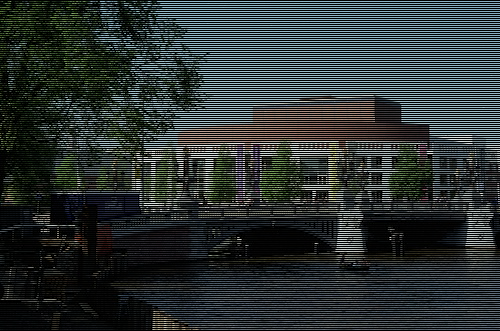

In [ ]:
new_img, coordinate = horizontal_stripes(img)
cv2_imshow(new_img)

## **Data generation**

In [ ]:
def Data_train(img, X_test_list):
  ''' 
  Create dataset for model training
  '''
  (h,w,d) = img.shape
  new_img = img.copy()
  coordinate, rgb = [], []
  for i in range(0,h):
    for j in range(0,w):
      if [i,j] not in X_test_list:
        coordinate.append([i,j])
        r, g, b = new_img[i,j,0], new_img[i,j,1], new_img[i,j,2]
        rgb.append([r,g,b])
  X_train = np.asarray(coordinate)
  Y_train = np.asarray(rgb)
  print("Training set: ", X_train.shape, Y_train.shape)
  return X_train, Y_train

In [ ]:
def Data_test(img, X_test_list):
  ''' 
  Create dataset for model test
  '''
  (h,w,d) = img.shape
  new_img = img.copy()
  rgb = []
  for i in range(0,h):
    for j in range(0,w):
      if [i,j] in X_test_list:
        r, g, b = new_img[i,j,0], new_img[i,j,1], new_img[i,j,2]
        rgb.append([r,g,b])
  X_test = np.asarray(X_test_list)
  Y_test = np.asarray(rgb)
  print("Testing set: ", X_test.shape, Y_test.shape)
  return X_test, Y_test

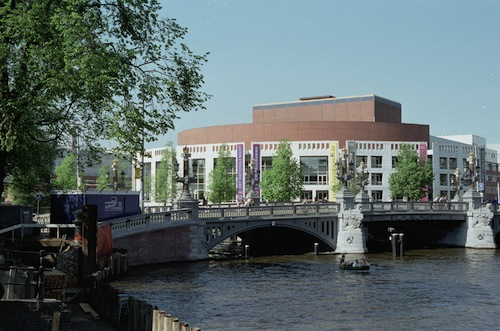

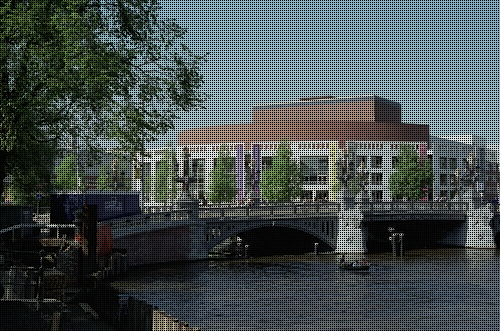

Training set:  (124000, 2) (124000, 3)
Testing set:  (41500, 2) (41500, 3)


In [ ]:
cv2_imshow(img)
# new_img = rectangle_type(img, 100, 200) #shape [*,*,3]
new_img, X_test_list = grid_type(img) #shape [*,*,3]
cv2_imshow(new_img)
img2 = img/255
new_img2 = new_img/255 # nomalization


X_train, Y_train = Data_train(new_img2, X_test_list)
X_test, Y_test = Data_test(img2, X_test_list)

## **Model creation using Keras**

In [ ]:
import tensorflow as tf
from tensorflow.keras import *
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.4.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
backend.clear_session()

In [ ]:
class Network1(tf.keras.Model):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1 = layers.Dense(units=10, activation='relu')
        self.fc2 = layers.Dense(units=1, activation='sigmoid')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

In [ ]:
class Network2(tf.keras.Model):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = layers.Dense(units=10, activation='relu')
        self.fc2 = layers.Dense(units=1, activation='sigmoid')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

In [ ]:
class Network3(tf.keras.Model):
    def __init__(self):
        super(Network3, self).__init__()
        self.fc1 = layers.Dense(units=10, activation='relu')
        self.fc2 = layers.Dense(units=1, activation='sigmoid')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

In [ ]:
model1 = Network1() 
model1.build(input_shape=(None, 2)) # num_batch, input_size
model1.summary() # print the network

model2 = Network2() 
model2.build(input_shape=(None, 2)) # num_batch, input_size
model2.summary() # print the network

model3 = Network3() 
model3.build(input_shape=(None, 2)) # num_batch, input_size
model3.summary() # print the network

Model: "network1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  30        
_________________________________________________________________
dense_1 (Dense)              multiple                  11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Model: "network2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  30        
_________________________________________________________________
dense_3 (Dense)              multiple                  11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Model: "network3"
______________________________

## **Model training demo (using Keras)**

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,
                              patience=2, verbose=0, mode='auto',
                              baseline=None, restore_best_weights=False)

In [ ]:
model1.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history1 = model1.fit(X_train, Y_train[:,0], batch_size=128, epochs=1000, validation_split=0.2, shuffle = True, callbacks = [early_stopping])
print('Training finished:')


Begin training:
Epoch 1/1000
775/775 [==============================] - 2s 2ms/step - loss: 0.4138 - val_loss: 0.2694
Epoch 2/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.2557 - val_loss: 0.2278
Epoch 3/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1843 - val_loss: 0.1397
Epoch 4/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1674 - val_loss: 0.1324
Epoch 5/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1642 - val_loss: 0.1119
Epoch 6/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1605 - val_loss: 0.1865
Epoch 7/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1598 - val_loss: 0.1089
Epoch 8/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1631 - val_loss: 0.0845
Epoch 9/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1603 - val_loss: 0.1598
Epoch 10/1000
775/775 [==============================] - 1s 2ms/st

In [ ]:
model2.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history2 = model2.fit(X_train, Y_train[:,1], batch_size=128, epochs=1000, validation_split=0.2, shuffle = True, callbacks = [early_stopping])
print('Training finished:')

Begin training:
Epoch 1/1000
775/775 [==============================] - 2s 2ms/step - loss: 0.3320 - val_loss: 0.1535
Epoch 2/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1745 - val_loss: 0.1304
Epoch 3/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1700 - val_loss: 0.1221
Epoch 4/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1678 - val_loss: 0.1585
Epoch 5/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1655 - val_loss: 0.1141
Epoch 6/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1629 - val_loss: 0.1277
Epoch 7/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1636 - val_loss: 0.1304
Training finished:


In [ ]:
model3.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history3 = model3.fit(X_train, Y_train[:,2], batch_size=128, epochs=1000, validation_split=0.2, shuffle = True, callbacks = [early_stopping])
print('Training finished:')

Begin training:
Epoch 1/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.3696 - val_loss: 0.2374
Epoch 2/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.3627 - val_loss: 0.2355
Epoch 3/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.2043 - val_loss: 0.1024
Epoch 4/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1512 - val_loss: 0.1239
Epoch 5/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1484 - val_loss: 0.1118
Training finished:


In [ ]:
print('Begin testing:')
result_r = model1.predict(X_test)
result_g = model2.predict(X_test)
result_b = model3.predict(X_test)
result = np.concatenate((result_r, result_g, result_b), axis = 1)
result_denormalization = result*255 #denormalization
print(result_denormalization)

Begin testing:
[[ 85.04363  137.895    121.11246 ]
 [147.50276  162.54129  127.28697 ]
 [148.12091  162.82085  127.54815 ]
 ...
 [ 69.486626  54.508205 105.1014  ]
 [ 68.69765   54.710953 105.35415 ]
 [ 67.91435   54.91548  105.60754 ]]


## **Reconstruction of image and calculation of test loss**

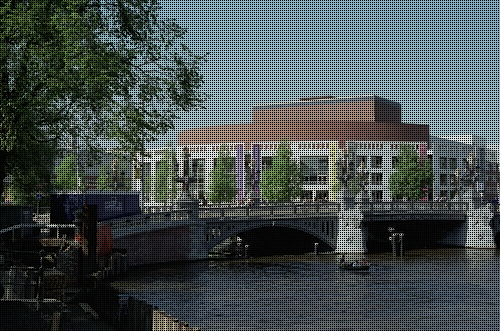

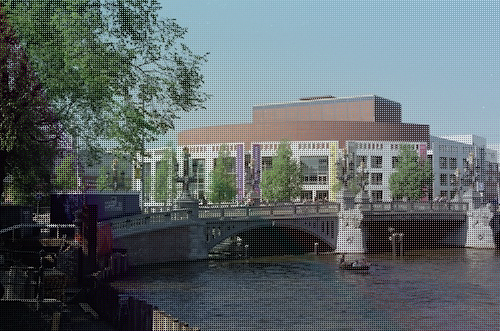

In [ ]:
cv2_imshow(new_img)
# reconstruction of image
reconstructed_img = new_img.copy()

for i in range(len(X_test)):
    x, y = int(X_test[i][0]), int(X_test[i][1])
    r, g, b = result_denormalization[i,:]
    reconstructed_img[x,y,:] = [r,g,b]
cv2_imshow(reconstructed_img)

In [ ]:
Loss_test = np.linalg.norm(result-Y_test/255,ord=None,axis=1,keepdims=True)
Loss_test_denormalized = np.linalg.norm(result_denormalization-Y_test,ord=None,axis=1,keepdims=True)
print("Loss_test: ", Loss_test)
print("Loss_test_denormalized: ", Loss_test_denormalized)

Loss_test:  [[0.79222807]
 [0.99285614]
 [0.99684303]
 ...
 [0.53551239]
 [0.53512652]
 [0.53478691]]
Loss_test_denormalized:  [[202.01815232]
 [253.17830993]
 [254.19496506]
 ...
 [136.55565858]
 [136.457263  ]
 [136.37065992]]


## **Model training (without using Keras): too slow**

In [ ]:
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

In [ ]:
def train_step(model, inputs, labels): #inputs：X_train; labels：Y_train
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = tf.keras.losses.mean_squared_error(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)

In [ ]:
def test_step(model, inputs, labels): #inputs：X_train; labels：Y_train
  predictions = model(inputs)
  t_loss = tf.keras.losses.mean_squared_error(labels, predictions)
  test_loss(t_loss)

In [ ]:
# EPOCHS = 5

# for epoch in range(EPOCHS):
#   # train_loss.reset_states()
#   # test_loss.reset_states()
# # len(X_train)
#   for i in range(1,len(X_train)):
#     train_step(model, X_train[i,:].reshape(1,2), Y_train[i])

#   for i in range(1,len(X_validate)):
#     test_step(model, X_validate, Y_validate)

#   template = 'Epoch {}, Loss: {}, Test Loss: {}'
#   print(template.format(epoch+1,train_loss.result(),test_loss.result()))